In [2]:
#-*- coding: utf-8 -*-
#数据规范化
import pandas as pd

datafile = '../data/discretization_data.xls' #参数初始化
data = pd.read_excel(datafile) #读取数据
data = data[u'肝气郁结证型系数'].copy()


In [4]:
k = 4

d1 = pd.cut(data, k, labels = range(k)) #等宽离散化，各个类比依次命名为0,1,2,3

#等频率离散化
w = [1.0*i/k for i in range(k+1)]
w = data.describe(percentiles = w)[4:4+k+1] #使用describe函数自动计算分位数
w[0] = w[0]*(1-1e-10)
d2 = pd.cut(data, w, labels = range(k))

from sklearn.cluster import KMeans #引入KMeans
kmodel = KMeans(n_clusters = k, n_jobs = 4) #建立模型，n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data.values.reshape((len(data), 1))) #训练模型
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0) #输出聚类中心，并且排序（默认是随机序的）
#w = pd.rolling_mean(c, 2).iloc[1:] #相邻两项求中点，作为边界点
w = c.rolling(2).mean().iloc[1:]
w = [0] + list(w[0]) + [data.max()] #把首末边界点加上
d3 = pd.cut(data, w, labels = range(k))



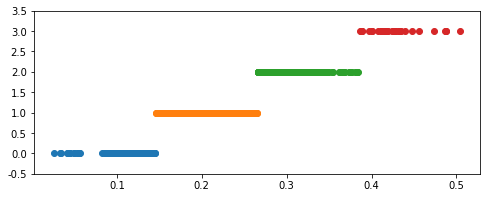

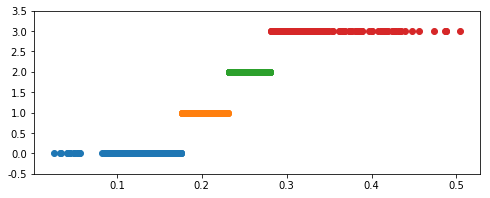

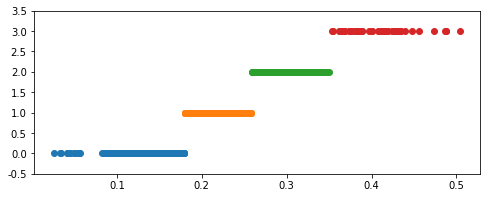

In [5]:
def cluster_plot(d, k): #自定义作图函数来显示聚类结果
  import matplotlib.pyplot as plt
  #plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
  
  plt.figure(figsize = (8, 3))
  for j in range(0, k):
    plt.plot(data[d==j], [j for i in d[d==j]], 'o')
  
  plt.ylim(-0.5, k-0.5)
  return plt

cluster_plot(d1, k).show()

cluster_plot(d2, k).show()
cluster_plot(d3, k).show()